# Code to produce figure 4 and 5a

### Zoïs Moitier (2021)
            
_Karlsruhe Institute of Technology, Germany_

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import Analytic
import BIE

%matplotlib inline

## Internal plotting functions

In [2]:
def calc_err(result, u_ana, u_max):
    return np.abs(result[0] - u_ana).max() / u_max

In [3]:
def plot_err(α, k, N, ε_vec, type_field, m, slope):
    nb_ε = np.size(ε_vec, 0)
    θ, _ = BIE.grid(N)

    err_pqr = np.zeros(nb_ε)
    err_mpqr = np.zeros(nb_ε)
    err_qpax = np.zeros(nb_ε)

    for i, ε in enumerate(ε_vec):
        E = BIE.ellipse(ε)
        c, ξ0 = Analytic.ellipse_param(1, ε)

        x, y = ε * np.cos(θ), np.sin(θ)
        ξ, η = Analytic.to_elliptic(c, x, y)

        if type_field.startswith("eve"):
            in_field = Analytic.create_field(
                c, k, [[(m, 1)], [], [], []], [[], [], [], []]
            )
        if type_field.startswith("odd"):
            in_field = Analytic.create_field(
                c, k, [[], [], [], []], [[(m, 1)], [], [], []]
            )

        if type_field.startswith("ful"):
            in_field = Analytic.field_plane_wave(α, k, c, m)

        def trace(x, y):
            ξ, η = Analytic.to_elliptic(c, x, y)
            return Analytic.eval_field(in_field, ξ, η)

        sc_field = Analytic.solve_field(in_field, ξ0, 1)

        u_ana = Analytic.eval_field(sc_field, ξ, η) + Analytic.eval_field(
            in_field, ξ, η
        )
        u_max = np.abs(u_ana).max()

        err_pqr[i] = calc_err(BIE.helmholtz_pqr(E, k, trace, N), u_ana, u_max)
        err_mpqr[i] = calc_err(BIE.helmholtz_mpqr(E, k, trace, N, ε), u_ana, u_max)
        err_qpax[i] = calc_err(
            BIE.helmholtz_qpax(ε, k, Analytic.expansion_trace(in_field), N),
            u_ana,
            u_max,
        )

    fig_size = [1.25 * e for e in [6.4, 4.8]]
    fig, ax = plt.subplots(figsize=fig_size, constrained_layout=True)

    ax.loglog(ε_vec, err_pqr, "o", ls="solid", label="PTR")
    ax.loglog(ε_vec, err_mpqr, "P", ls="dashdot", label="MTR")
    ax.loglog(ε_vec, err_qpax, "X", ls="dashed", label="QPAX")

    if slope[0]:
        ε_ = np.array([1e-8, 1e-3])
        ax.loglog(ε_, 10 ** (-0.5) * ε_, "k", label=r"$\mathcal{O}(\varepsilon)$")

    if slope[1]:
        ε_ = np.array([1e-5, 1e-3])
        ax.loglog(ε_, ε_ ** 2, "k--", label=r"$\mathcal{O}(\varepsilon^2)$")

    ax.set_xlim(1e-8 / 10 ** 0.5, 1 * 10 ** 0.5)
    ax.set_xlabel(r"$\varepsilon$", fontsize=15)
    ax.set_ylim(1e-16 / 10, 10)
    ax.set_ylabel("error relative", fontsize=15)
    ax.grid(True)

    ax.legend(loc=4, fontsize=15)
    ax.set_title(f"Number of quadrature points 2N = {N}", fontsize=15)

    return None

## Parameters

In [4]:
## Incident field parameters
α = 0  # (cos(α), sin(α)) direction of the plane wave
k = 2  # wavenumber direction of the plane wave

In [5]:
## Discretization parameters
N = 64  # Number of quadrature points

nb_ε = 16  # Number of ε
ε_min, ε_max = 1e-8, 0.9  # Limits for ε
ε_vec = np.geomspace(ε_min, ε_max, num=nb_ε)

## Relative error for even solution

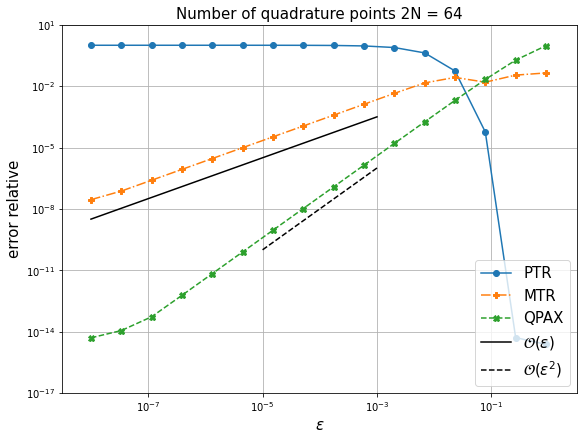

In [6]:
plot_err(α, k, N, ε_vec, "even", 3, (True, True))

## Relative error for odd solution

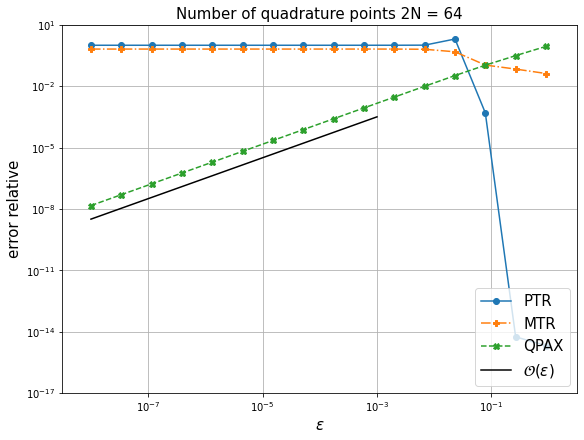

In [7]:
plot_err(α, k, N, ε_vec, "odd", 2, (True, False))

## Relative error for the full wave

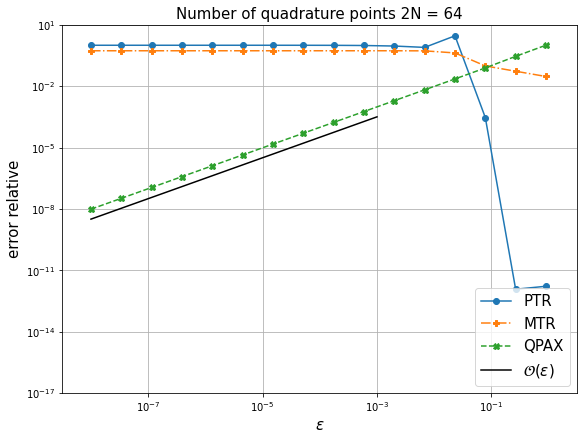

In [8]:
plot_err(α, k, N, ε_vec, "full", 15, (True, False))